# Modelo predictivo para el bitcoin basado en dos variables con alto respaldo financiero.

Las criptomonedas han iniciado una revolucion financiera comparada con la eliminación del patron oro en los años 40', desde su
lanzamiento en 2008 su valor se ha incrementado de forma importante hasta superar los 60 mil USD marcando un hito para la forma de
respaldo de inversiones que se llevaban hasta ahora.
Con el fin de establecer la incidencia en la principal criptomoneda, se desea evaluar la dependencia de los dos principales productos que
respaldan las inversiones a nivel mundial (petróleo y oro) y evaluar si el crecimiento del bitcoin depende a la alta volatilidad de que han
presentados los comodities en los últimos años.

## 1. Librerìas 

In [1]:
import numpy as np
import pandas as pd
from bokeh.io import curdoc, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, CategoricalColorMapper, Slider, CustomJS
from bokeh.palettes import Spectral6
from bokeh.layouts import widgetbox, row
from ipywidgets import interact
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import column
from bokeh.plotting import Figure, output_file, show
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
import warnings
from plotly.graph_objects import Layout
import plotly.graph_objects as go
import plotly.figure_factory as ff
warnings.filterwarnings('ignore')
import datetime
from sklearn.preprocessing import MinMaxScaler

## 2. Base de Datos

In [2]:
data=pd.read_csv('https://raw.githubusercontent.com/jpdulcey/Trabajo_Final/main/Consolidado.csv', )
round(data, 2)
data.head()

,Date,Open_Bit,High_Bit,Low_Bit,Close_Bit,Adj Close_Bit,Volume_Bit,Open_WTI,High_WTI,Low_WTI,Close_WTI,Adj Close_WTI,Volume_WTI,Open_Gold,High_Gold,Low_Gold,Close_Gold,Adj Close_Gold,Volume_Gold
0,2016-01-04,430.061005,434.516998,429.084015,433.091003,433.091003,38477500.0,2.44,2.56,2.27,2.37,2.37,1947800,1063.4,1082.5,1063.2,1075.1,1075.1,143.0
1,2016-01-05,433.069000,434.182007,429.675995,431.959991,431.959991,34522600.0,2.33,2.35,2.13,2.21,2.21,1945700,1075.6,1081.5,1075.3,1078.4,1078.4,82.0
2,2016-01-06,431.855988,431.855988,426.341003,429.105011,429.105011,34042500.0,2.14,2.16,2.10,2.12,2.12,763200,1081.6,1093.7,1081.6,1091.9,1091.9,52.0
3,2016-01-07,430.010986,458.765991,429.076996,458.048004,458.048004,87562200.0,2.03,2.08,1.93,1.93,1.93,2068800,1091.6,1109.4,1091.6,1107.7,1107.7,122.0
4,2016-01-08,457.537994,462.933990,447.937988,453.230011,453.230011,56993000.0,1.99,2.01,1.90,1.93,1.93,1940500,1111.1,1111.1,1093.0,1097.8,1097.8,98.0


### Eliminar Columnas que no se requieren

Para el análisis de dependencia y pronóstico de los valores del Bitcoin, solo se utilizará los valores de apertura y cierre.

In [3]:
data.columns.values

array(['Date', 'Open_Bit', 'High_Bit', 'Low_Bit', 'Close_Bit',
       'Adj Close_Bit', 'Volume_Bit', 'Open_WTI', 'High_WTI', 'Low_WTI',
       'Close_WTI', 'Adj Close_WTI', 'Volume_WTI', 'Open_Gold',
       'High_Gold', 'Low_Gold', 'Close_Gold', 'Adj Close_Gold',
       'Volume_Gold'], dtype=object)

In [4]:
data=data.drop(['Adj Close_Bit', 'Volume_Bit', 'Adj Close_WTI', 'Volume_WTI','Adj Close_Gold','Volume_Gold'], axis=1)
data.head()

,Date,Open_Bit,High_Bit,Low_Bit,Close_Bit,Open_WTI,High_WTI,Low_WTI,Close_WTI,Open_Gold,High_Gold,Low_Gold,Close_Gold
0,2016-01-04,430.061005,434.516998,429.084015,433.091003,2.44,2.56,2.27,2.37,1063.4,1082.5,1063.2,1075.1
1,2016-01-05,433.069000,434.182007,429.675995,431.959991,2.33,2.35,2.13,2.21,1075.6,1081.5,1075.3,1078.4
2,2016-01-06,431.855988,431.855988,426.341003,429.105011,2.14,2.16,2.10,2.12,1081.6,1093.7,1081.6,1091.9
3,2016-01-07,430.010986,458.765991,429.076996,458.048004,2.03,2.08,1.93,1.93,1091.6,1109.4,1091.6,1107.7
4,2016-01-08,457.537994,462.933990,447.937988,453.230011,1.99,2.01,1.90,1.93,1111.1,1111.1,1093.0,1097.8


### Verificar datos faltantes

In [5]:
data2=pd.read_csv('https://raw.githubusercontent.com/jpdulcey/Trabajo_Final/main/Consolidado.csv', )
data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1483 non-null   object 
 1   Open_Bit    1481 non-null   float64
 2   High_Bit    1481 non-null   float64
 3   Low_Bit     1481 non-null   float64
 4   Close_Bit   1481 non-null   float64
 5   Open_WTI    1483 non-null   float64
 6   High_WTI    1483 non-null   float64
 7   Low_WTI     1483 non-null   float64
 8   Close_WTI   1483 non-null   float64
 9   Open_Gold   1470 non-null   float64
 10  High_Gold   1470 non-null   float64
 11  Low_Gold    1470 non-null   float64
 12  Close_Gold  1470 non-null   float64
dtypes: float64(12), object(1)
memory usage: 150.7+ KB


Existen datos faltantes dado que hay variables con menos de 1483 datos

In [6]:
data=data.fillna(method='pad')
data2=data2.fillna(method='pad')

Con el fin de llenar los datos nulos, se establece que sean duplicados por el valor inmediatamente superior, de esta forma los resultados
finales de los precios de las posiciones analizadas.

## Análisis Descriptivo

### Boxplot

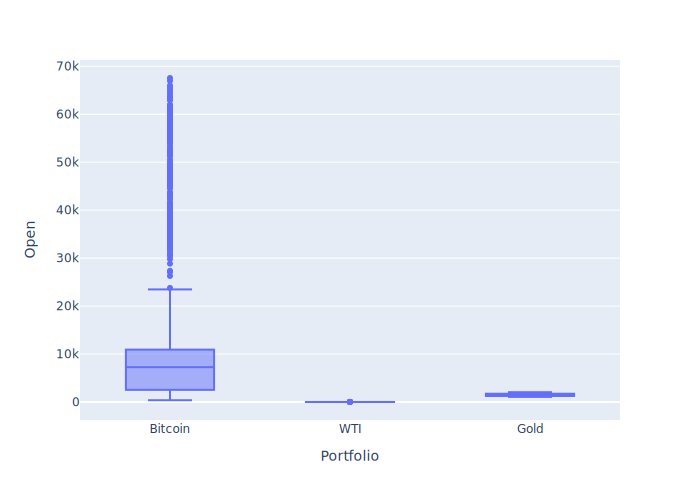

In [7]:
data2=pd.read_csv('https://raw.githubusercontent.com/jpdulcey/Trabajo_Final/main/Consolidado2.csv', )
data2 = data2.replace(np.nan,'na')
data2.fillna(method = 'ffill')
fig = px.box(data2, x = 'Portfolio', y = 'Open', notched = False)
fig.show(renderer="svg")

Debido a la comportamiento creciente continuo del bitcoin, se registran una cantidad significativa de valores atípicos, este
comportamiento coincide con las cifras fincieras de movimientos asencientes significativos en los precios de la criptomoneda.

### b. Análisis Gráfico

data['Date'] = pd.to_datetime(data.Date, format='%Y-%m-%d %H:%M:%S')
data['Year'] = data['Date'].dt.year
data.head()

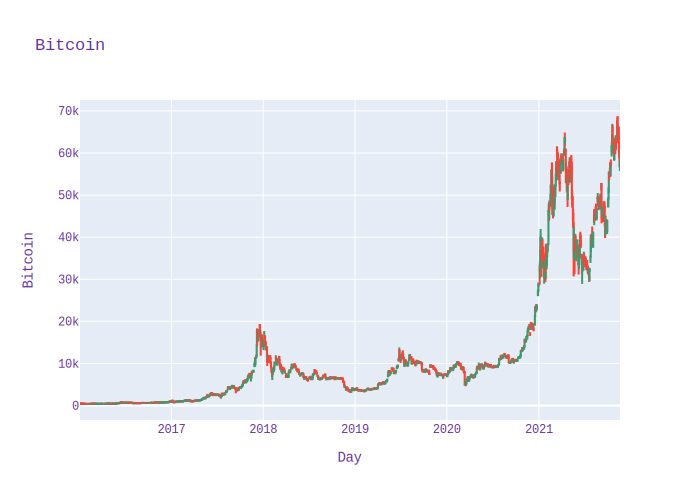

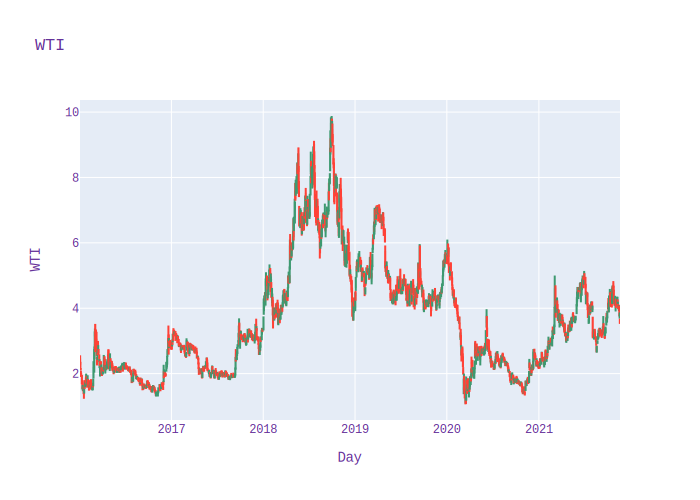

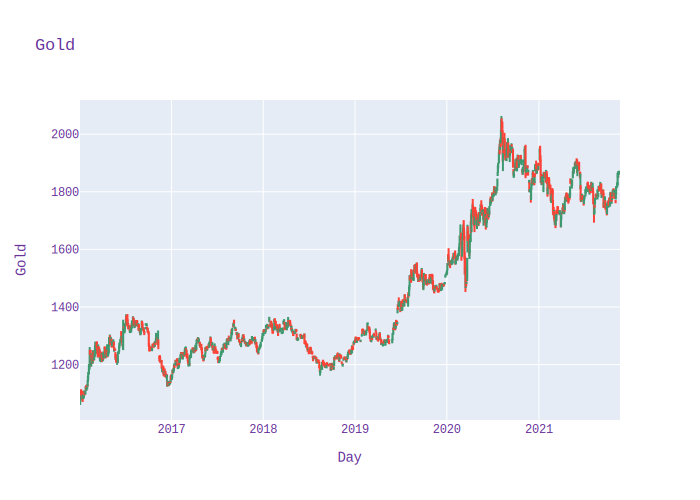

<AxesSubplot:>

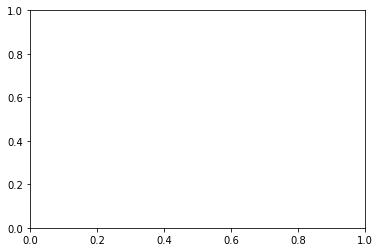

In [8]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Candlestick(x = data.Date,
open = data.Open_Bit,
high = data.High_Bit,
low = data.Low_Bit,
close = data.Close_Bit)
                    ])
fig.update_layout(
title="Bitcoin",
xaxis_title="Day",
yaxis_title="Bitcoin",
font=dict(
family="Courier New, monospace",
size=12,
color="RebeccaPurple"
    )
)
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show(renderer="svg")
fig2 = go.Figure(data=[go.Candlestick(x = data.Date,
open = data.Open_WTI,
high = data.High_WTI,
low = data.Low_WTI,
close = data.Close_WTI)
                    ])
fig2.update_layout(
title="WTI",
xaxis_title="Day",
yaxis_title="WTI",
font=dict(
family="Courier New, monospace",
size=12,
color="RebeccaPurple"
    )
)
fig2.update_layout(xaxis_rangeslider_visible=False)
fig2.show(renderer="svg")
fig3 = go.Figure(data=[go.Candlestick(x = data.Date,
open = data.Open_Gold,
high = data.High_Gold,
low = data.Low_Gold,
close = data.Close_Gold)
                    ])
fig3.update_layout(
title="Gold",
xaxis_title="Day",
yaxis_title="Gold",
font=dict(
family="Courier New, monospace",
size=12,
color="RebeccaPurple"
    )
)
fig3.update_layout(xaxis_rangeslider_visible=False)
fig3.show(renderer="svg")
plt.subplot( 1, 1, 1)

Como se ha comentado anteriormente, el bitcoin presenta movimientos exponenciales crecientes, en esta misma fase los futuros del
petróleo WTI han disminuido de forma considerable. Por otro lado, el oro se ha mantenido creciente pero de forma más mesurada que la
criptomoneda

### c. Descriptivo

In [9]:
round(data.describe(),0)

,Open_Bit,High_Bit,Low_Bit,Close_Bit,Open_WTI,High_WTI,Low_WTI,Close_WTI,Open_Gold,High_Gold,Low_Gold,Close_Gold
count,1483.0,1483.0,1483.0,1483.0,1483.0,1483.0,1483.0,1483.0,1483.0,1483.0,1483.0,1483.0
mean,12300.0,12652.0,11903.0,12315.0,4.0,4.0,4.0,4.0,1450.0,1457.0,1444.0,1451.0
std,15802.0,16256.0,15240.0,15793.0,2.0,2.0,2.0,2.0,250.0,252.0,247.0,250.0
min,369.0,375.0,364.0,364.0,1.0,1.0,1.0,1.0,1063.0,1082.0,1063.0,1074.0
25%,2543.0,2613.0,2452.0,2534.0,2.0,2.0,2.0,2.0,1257.0,1264.0,1253.0,1257.0
50%,7268.0,7446.0,7101.0,7278.0,3.0,3.0,3.0,3.0,1322.0,1327.0,1319.0,1322.0
75%,10940.0,11272.0,10626.0,10928.0,5.0,5.0,4.0,5.0,1723.0,1730.0,1711.0,1722.0
max,67550.0,68790.0,66382.0,67567.0,10.0,10.0,9.0,10.0,2046.0,2063.0,2040.0,2052.0


Es claro que el bitcoin presenta valores significativamente altos, dado que su balor máximo dista mucho del tercer cuartil; las otras dos
variables tienen un comportamiento similar, pero la diferencia es mucho menor.